In [1]:
# Import all the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the data and look at few records
df = pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
# convert dteday to datetime
df.dteday = pd.to_datetime(df.dteday,  format='%d-%m-%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [6]:
# validate individual columns for identifying data discripancies.
len(df.instant.unique())

730

In [7]:
# Since instant is all unique value and may create bias in the model we will drop it
df = df.drop('instant', axis = 1)
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
# validating unique date and range
print(len(df.dteday.unique()))
print("The date range is from {} to {}".format(min(df.dteday), max(df.dteday)))

730
The date range is from 2018-01-01 00:00:00 to 2019-12-31 00:00:00


In [9]:
# Validating the fields related to date.
# validating year
set(list(zip(df.dteday.dt.year,df.yr)))

{(2018, 0), (2019, 1)}

In [10]:
# Validating month
set(list(zip(df.dteday.dt.month,df.mnth)))

{(1, 1),
 (2, 2),
 (3, 3),
 (4, 4),
 (5, 5),
 (6, 6),
 (7, 7),
 (8, 8),
 (9, 9),
 (10, 10),
 (11, 11),
 (12, 12)}

In [11]:
# Extracting day from dteday
df["day"] = df.dteday.dt.day
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
0,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1
1,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2
2,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,3
3,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,4
4,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,5


In [12]:
# Validating holiday
df.holiday.value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [13]:
# validating weekday
df.weekday.value_counts()

0    105
1    105
6    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64

In [14]:
# validating workingday
df.workingday.value_counts()

1    499
0    231
Name: workingday, dtype: int64

In [15]:
# workingday against holiday, assumption all holidays should be non-workingday
set(list(zip(df[df.holiday == 1].holiday, df[df.holiday == 1].workingday)))

{(1, 0)}

In [16]:
# weekday agninst workingday, to identidy start of day. compairasion against non-holiday for getting proper maping
set(list(zip(df[df.holiday == 0].weekday, df[df.holiday == 0].workingday)))

{(0, 0), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 0)}

In [17]:
df.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [18]:
# looking at season on month on month basis
set(list(zip(df.dteday.dt.month, df.season)))

{(1, 1),
 (2, 1),
 (3, 1),
 (3, 2),
 (4, 2),
 (5, 2),
 (6, 2),
 (6, 3),
 (7, 3),
 (8, 3),
 (9, 3),
 (9, 4),
 (10, 4),
 (11, 4),
 (12, 1),
 (12, 4)}

In [19]:
# dropping detday since all the relevant data is extracted from this column
df  = df.drop("dteday", axis = 1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,3
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,4
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,5


### Summary of actoion taked on date related fields
- Converted dteday to datetime
- Validated 'yr', mapping is correct according to data dictionary
- Validation of 'mnth' with dtedat
- Added 'day' column for day-of-month
- Validated holiday, all holidays are non-working
- Validated weekday, for all non-holiday, 0 and 6 are not working
    - Conclusion start of week is Sunday - 0
- Validation of 'season',
- Dropped 'dteday' since all the required reqyured details are validated and extracted

In [20]:
# The target variable 'cnt' is the sum of 'casual' and 'registered', we will drop these.
# NOTE: these values will also be not available during prediction
df = df.drop(['casual', 'registered'], axis = 1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,2
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,3
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,4
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,5


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

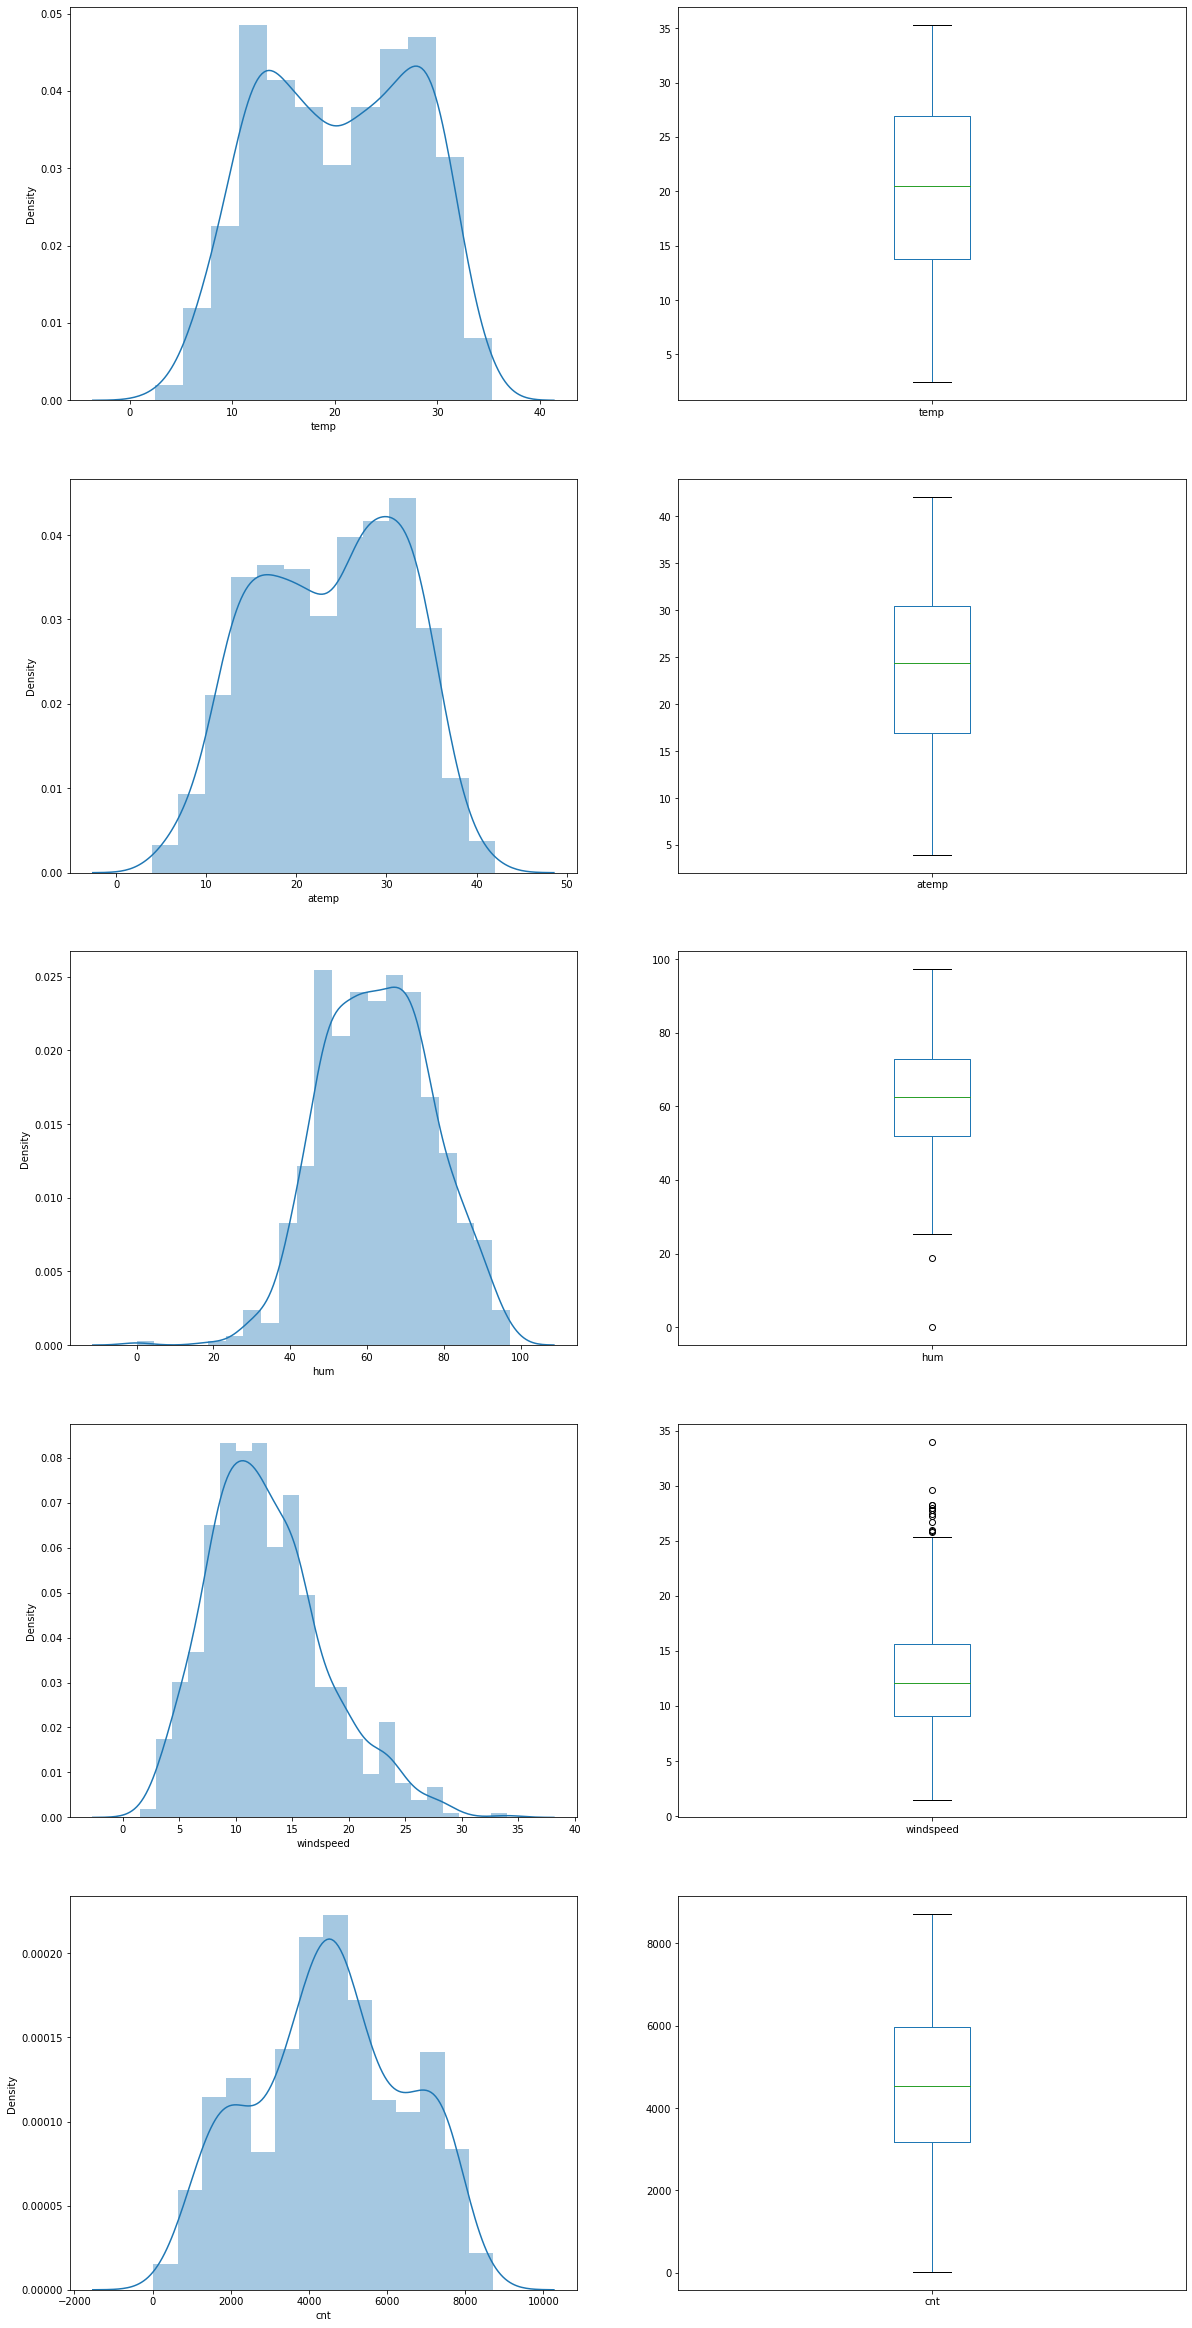

In [21]:
plt.figure(figsize= (20,42))
numcols = ['temp','atemp','hum','windspeed','cnt']
for col in numcols:
    plt.subplot(5, 2, numcols.index(col)*2 + 1)
    sns.distplot(df[col])
    plt.subplot(5, 2, numcols.index(col)*2 + 2)
    df[col].plot.box()
plt.show()

### Conclusion 
There are ouitlier present in windspeed and humidity, but since the scale of variable is not substintial we can include them in the model

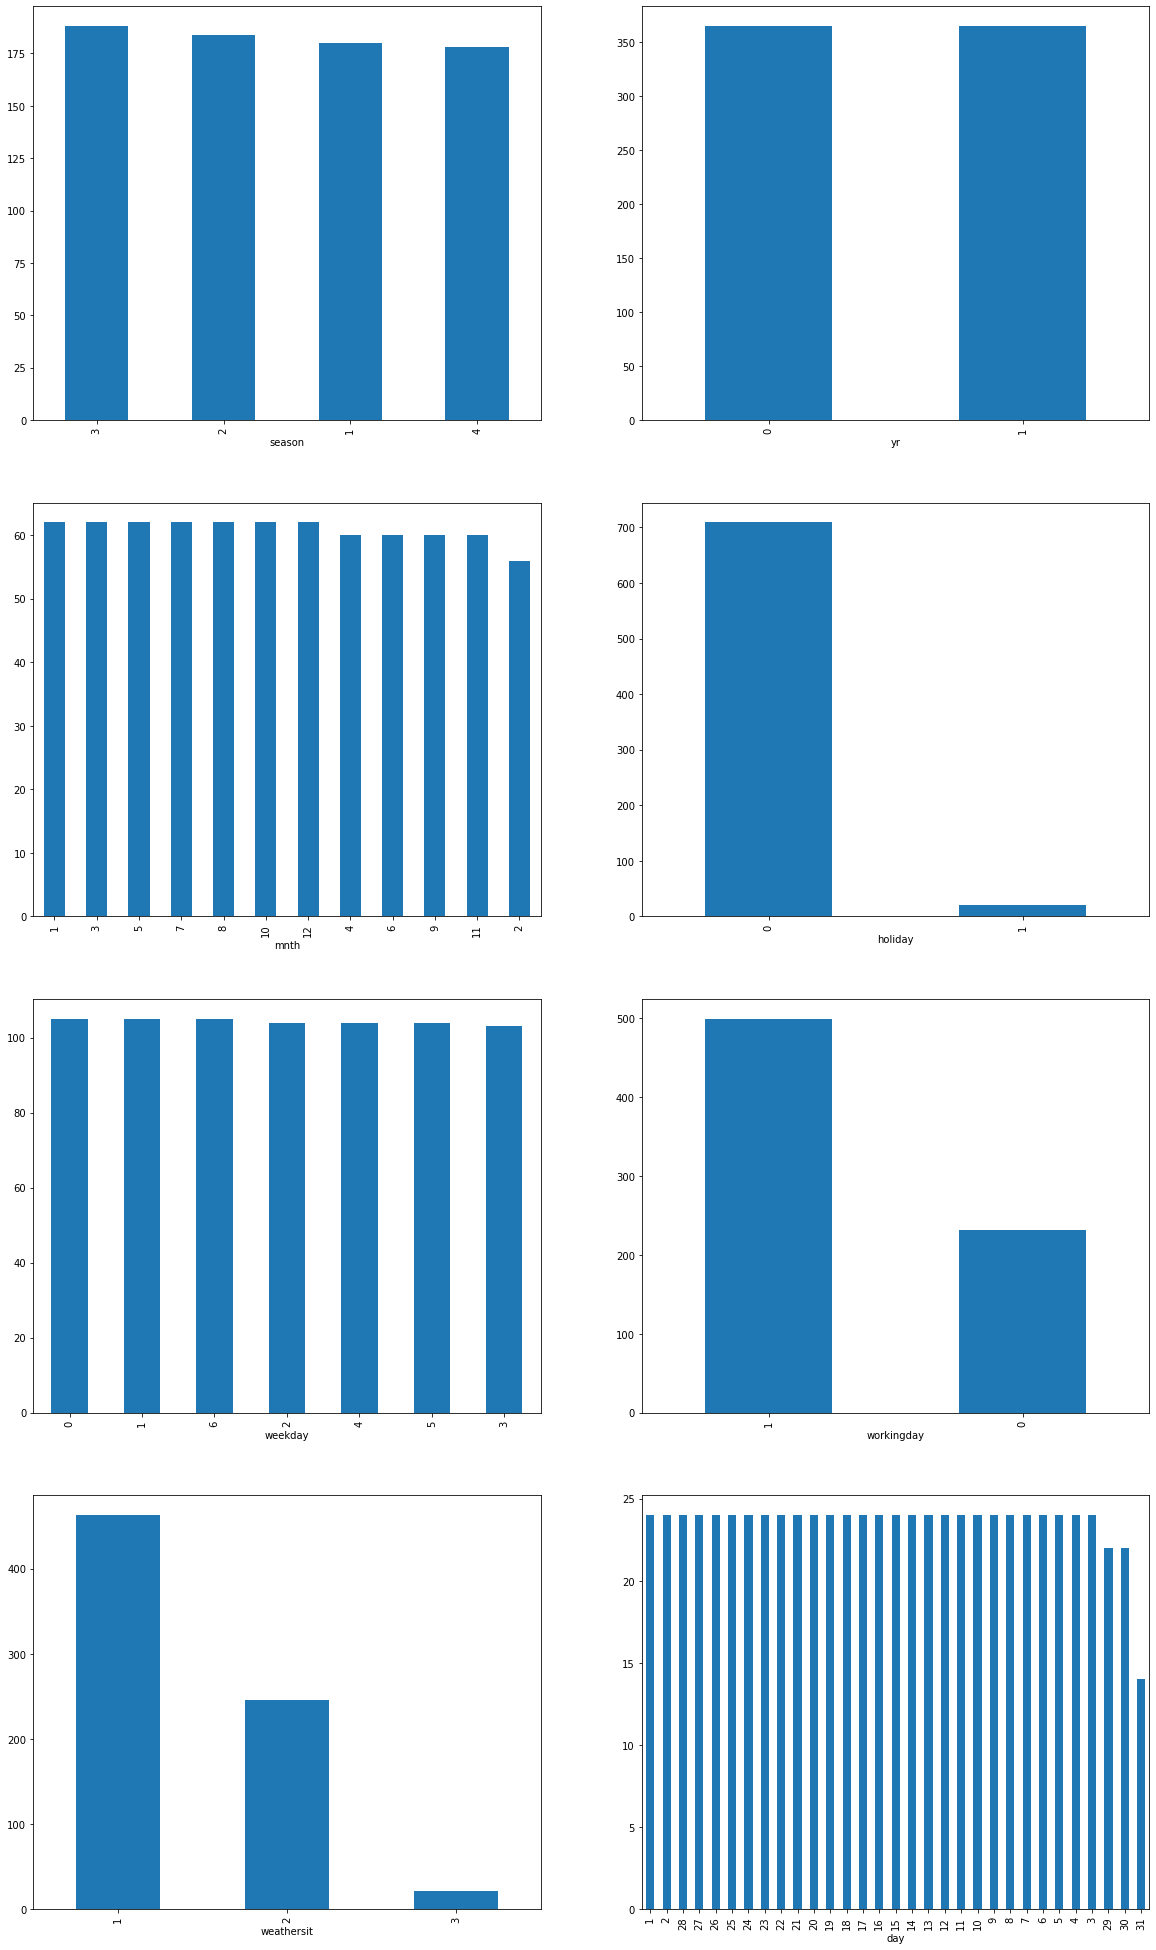

In [22]:
# now lets look at the distribution of categorical variables
cat_vars = ['season','yr','mnth','holiday','weekday','workingday','weathersit','day']
plt.figure(figsize = (20, 35))
for col in cat_vars:
    ax = plt.subplot(4,2, cat_vars.index(col) + 1)
    df[col].value_counts().plot.bar(xlabel= col)
    #ax.set_xlable(col)
    

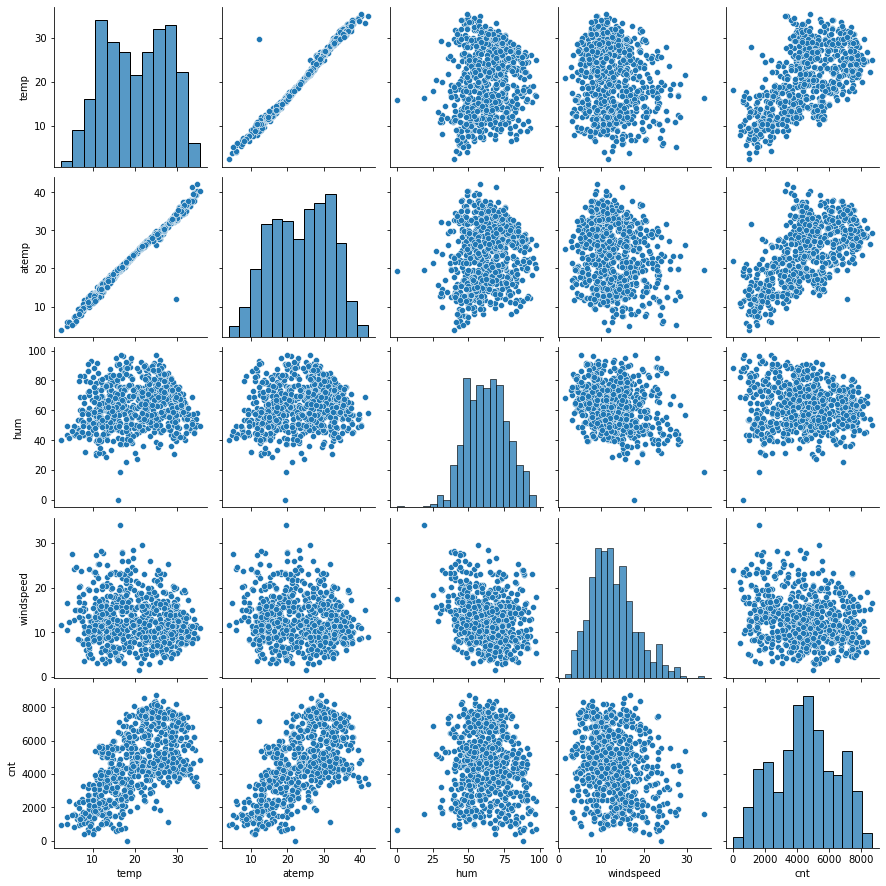

In [23]:
# creating pairplot for all the numeric variables
sns.pairplot(data = df[numcols])
plt.show()

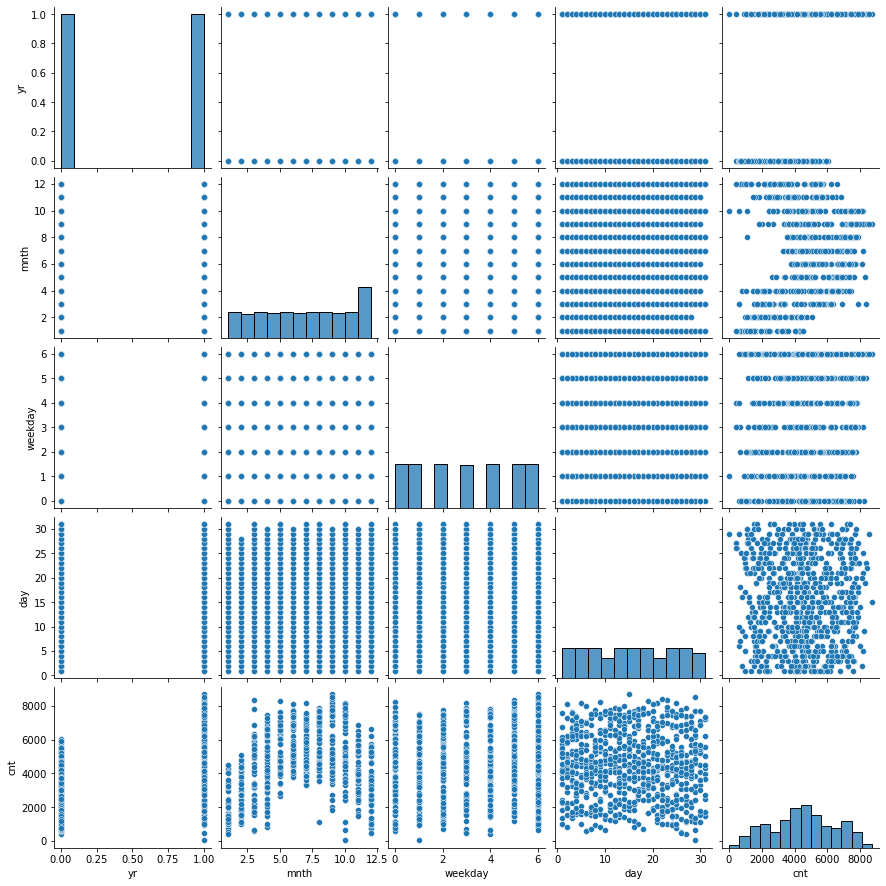

In [24]:
# creating pairplot for all the ordinal variables variables
sns.pairplot(data = df[['yr','mnth','weekday','day', 'cnt']])
plt.show()

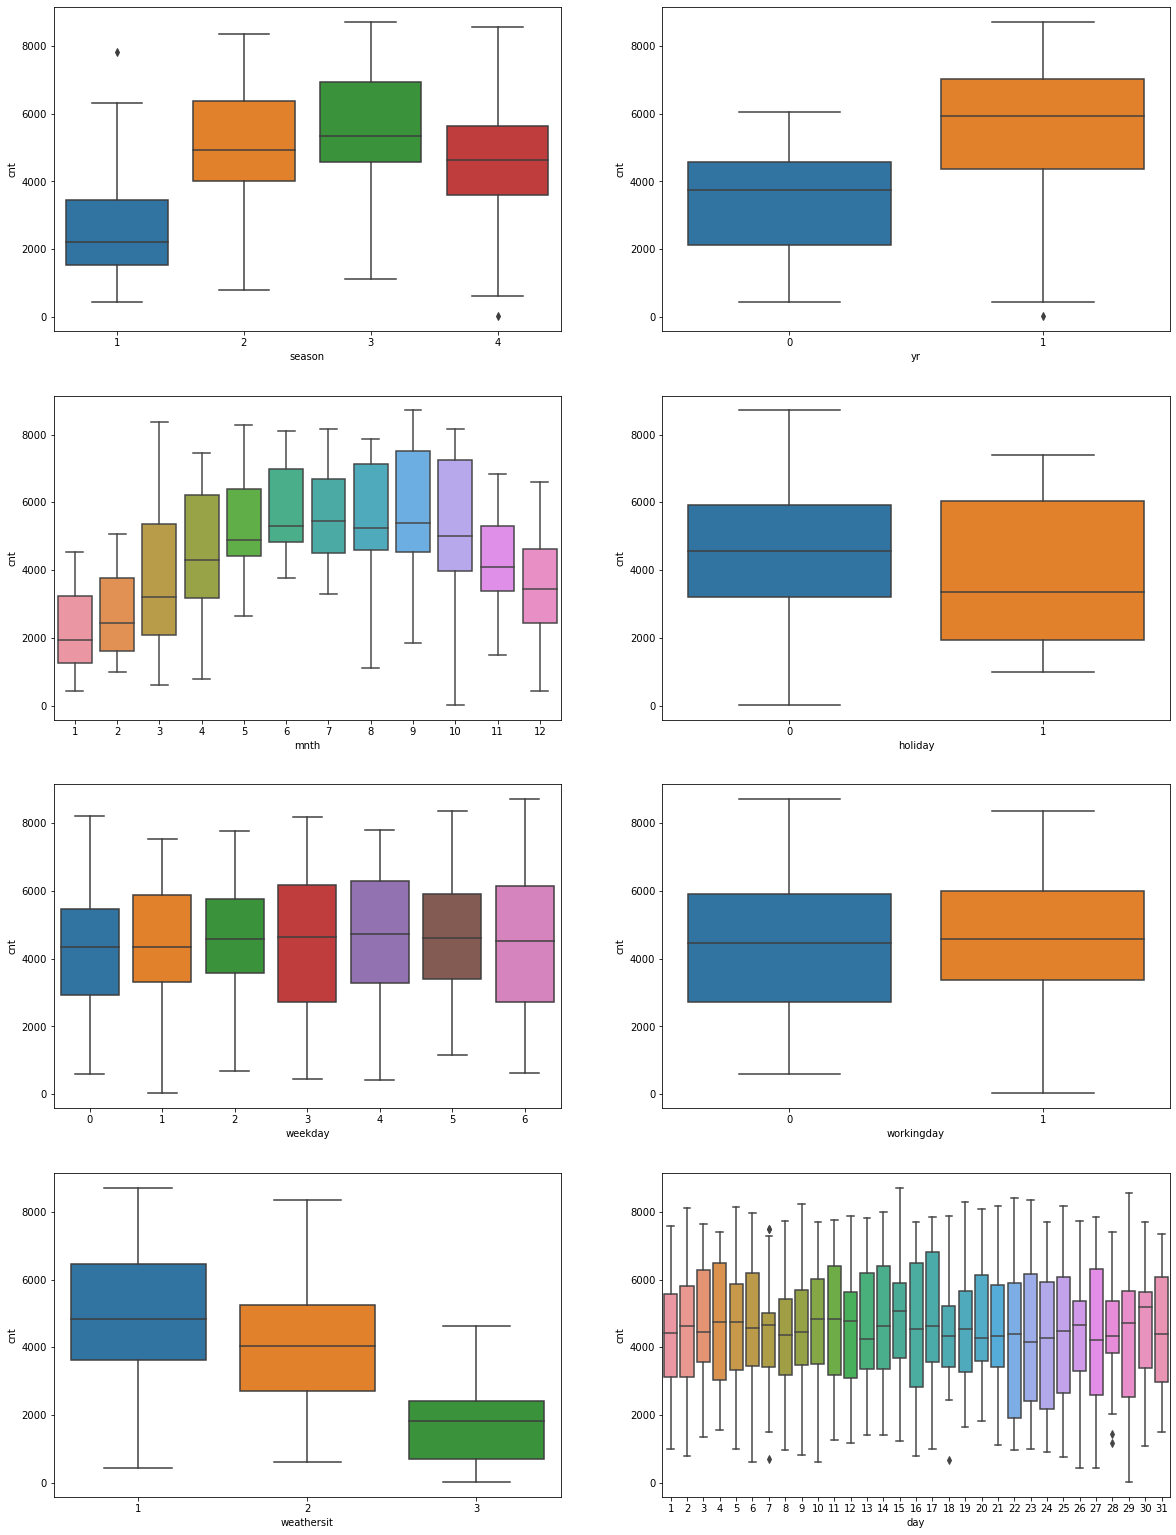

In [25]:
plt.figure(figsize=(20, 56))
for col in cat_vars:
    plt.subplot(8,2,cat_vars.index(col) + 1)
    sns.boxplot(x = col, y = 'cnt', data = df)
plt.show()

In [26]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,2
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,3
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,4
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,5


### Data Preparation:

Yes/No Variable : 
- holiday 
- workingday 
    

Since for the above two variables 1 -> yes and 0 -> no, no action required

Categorical Variables:
- season 
- weathersit

Since these are number encoded, we will create decoded column and them create dummy variables

In [27]:
# season maping
def map_sea(x):
    if x == 1:
        return 'spring'
    elif x == 2:
        return 'summer'
    elif x == 3:
        return 'fall'
    elif x == 4:
        return 'winter'
    
        
df.season = df.season.apply(lambda x:map_sea(x))

In [28]:
df.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [29]:
# weathersit maping
def map_weathersit (x):
    if x == 1:
        return 'clear'
    elif x == 2:
        return 'mist'
    elif x == 3:
        return 'rain'
    elif x == 4:
        return 'storm'
    
        
df.weathersit  = df.weathersit.apply(lambda x:map_weathersit(x))

In [30]:
df.weathersit.value_counts()

clear    463
mist     246
rain      21
Name: weathersit, dtype: int64

Creating Dummy Variables

In [31]:
weathersit = pd.get_dummies(df['weathersit'], drop_first = True)
season = pd.get_dummies(df['season'], drop_first = True)
weathersit.head()

,mist,rain
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [32]:
season.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [33]:
df = pd.concat([df,season,weathersit], axis = 1)

df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day,spring,summer,winter,mist,rain
0,spring,0,1,0,6,0,mist,14.110847,18.18125,80.5833,10.749882,985,1,1,0,0,1,0
1,spring,0,1,0,0,0,mist,14.902598,17.68695,69.6087,16.652113,801,2,1,0,0,1,0
2,spring,0,1,0,1,1,clear,8.050924,9.47025,43.7273,16.636703,1349,3,1,0,0,0,0
3,spring,0,1,0,2,1,clear,8.200000,10.60610,59.0435,10.739832,1562,4,1,0,0,0,0
4,spring,0,1,0,3,1,clear,9.305237,11.46350,43.6957,12.522300,1600,5,1,0,0,0,0


In [34]:
df.drop(['weathersit', 'season'], axis = 1, inplace = True)
df.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,day,spring,summer,winter,mist,rain
0,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,1,1,0,0,1,0
1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,2,1,0,0,1,0
2,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,3,1,0,0,0,0
3,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,4,1,0,0,0,0
4,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,5,1,0,0,0,0


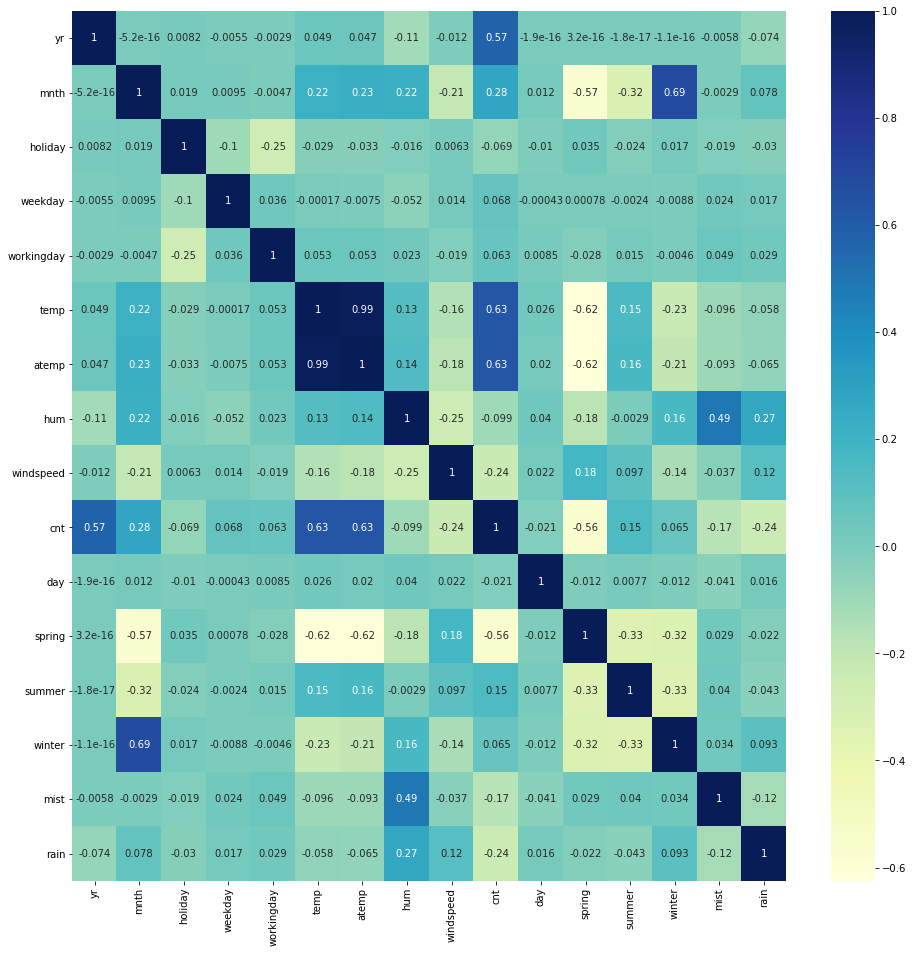

In [35]:
#Now lets look at the corelation between the variables
plt.figure(figsize = (16, 16))
sns.heatmap(df.corr(), cmap='YlGnBu', annot= True)
plt.show()

In [36]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, random_state = 100)

In [37]:
df.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,day,spring,summer,winter,mist,rain
0,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,1,1,0,0,1,0
1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,2,1,0,0,1,0
2,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,3,1,0,0,0,0
3,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,4,1,0,0,0,0
4,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,5,1,0,0,0,0


In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [39]:
numcols = ['temp','atemp','hum','windspeed','cnt','day','weekday','mnth']

df_train[numcols] = scaler.fit_transform(df_train[numcols])

<ipython-input-39-e6c2333ce65e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[numcols] = scaler.fit_transform(df_train[numcols])
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [40]:
df_train.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,day,spring,summer,winter,mist,rain
576,1,0.545455,0,0.333333,1,0.815169,0.766351,0.725633,0.264686,0.827658,1.000000,0,0,0,0,0
426,1,0.181818,0,1.000000,0,0.442393,0.438975,0.640189,0.255342,0.465255,0.066667,1,0,0,1,0
728,1,1.000000,0,0.000000,0,0.245101,0.200348,0.498067,0.663106,0.204096,0.966667,1,0,0,0,0
482,1,0.272727,0,1.000000,0,0.395666,0.391735,0.504508,0.188475,0.482973,0.900000,0,1,0,1,0
111,0,0.272727,0,0.833333,1,0.345824,0.318819,0.751824,0.380981,0.191095,0.700000,0,1,0,1,0


In [41]:
df_train.describe()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,day,spring,summer,winter,mist,rain
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.503743,0.025490,0.498366,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.486405,0.243137,0.247059,0.247059,0.345098,0.029412
std,0.500429,0.315038,0.157763,0.336182,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.297061,0.429398,0.431725,0.431725,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.181818,0.000000,0.166667,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.233333,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.545455,0.000000,0.500000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.818182,0.000000,0.833333,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.733333,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


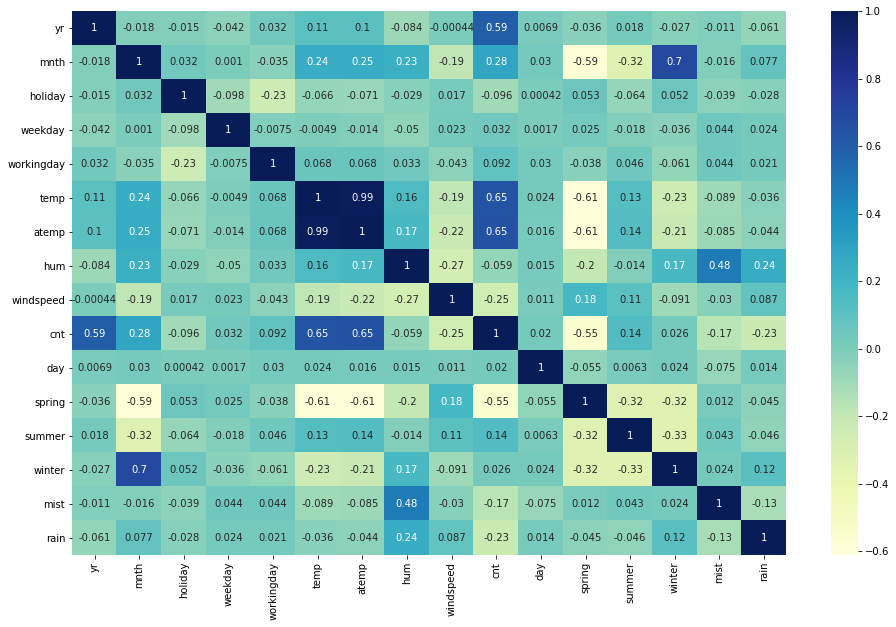

In [42]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [43]:
y_train = df_train.pop('cnt')
X_train = df_train

## Model building

In [ ]:
import statsmodels.api as sm

# adding a constant to only temp as it has the highest corelation
X_train_lm = sm.add_constant(X_train[['temp']])

# Create first fitted model
lr = sm.OLS(y_train, X_train_lm)
lr_model = lr.fit()

In [ ]:
# Lets check the summary for the model
lr_model.summary()

In [ ]:
# temp is able to explain 41.6% of the data, lets add another variable 'yr'
X_train_lm = pd.concat([X_train_lm, X_train['yr']], axis  = 1)

lr = sm.OLS(y_train, X_train_lm)
lr_model = lr.fit()

lr_model.summary()

In [ ]:
# model is able to explain 69% of the data, lets add another variable 'mnth'
X_train_lm = pd.concat([X_train_lm, X_train['mnth']], axis  = 1)

lr = sm.OLS(y_train, X_train_lm)
lr_model = lr.fit()

lr_model.summary()

In [ ]:
# model is able to explain 71.4% of the data, lets add season related variables
X_train_lm = pd.concat([X_train_lm, X_train[season.columns]], axis  = 1)

lr = sm.OLS(y_train, X_train_lm)
lr_model = lr.fit()

lr_model.summary()

In [ ]:
# model is able to explain 74.2% of the data, lets add hum and windspeed related variables
X_train_lm = pd.concat([X_train_lm, X_train[['hum','windspeed']]], axis  = 1)

lr = sm.OLS(y_train, X_train_lm)
lr_model = lr.fit()

lr_model.summary()

In [ ]:
# model is able to explain 79.4% of the data, lets add weather variables
X_train_lm = pd.concat([X_train_lm, X_train[['mist','rain']]], axis  = 1)

lr = sm.OLS(y_train, X_train_lm)
lr_model = lr.fit()

lr_model.summary()

In [ ]:
# lets check if holiday and workingday improves the model significantly
X_train_lm = pd.concat([X_train_lm, X_train[['holiday','workingday']]], axis  = 1)

lr = sm.OLS(y_train, X_train_lm)
lr_model = lr.fit()

lr_model.summary()

In [ ]:
# lets add weekday and day variable and see the result
X_train_lm = pd.concat([X_train_lm, X_train[['weekday','day']]], axis  = 1)

lr = sm.OLS(y_train, X_train_lm)
lr_model = lr.fit()

lr_model.summary()

In [ ]:
# lets add the last variable and see the result
X_train_lm = pd.concat([X_train_lm, X_train['atemp']], axis  = 1)

lr = sm.OLS(y_train, X_train_lm)
lr_model = lr.fit()

lr_model.summary()

### Colclusion
From the above excersixe we can see that the variables which improved the model significantly are below.
- temp  .415
- yr .415 -> .69
- mnth .69 -> .714
- Season ('spring', 'summer', 'winter') .714 - > .742
- hum, windspeed -> .742 -> .794
- Weather ('mist', 'rain')  -> .794 -> .820


Which is in accordance with the business understanding of the variables as well.

1. If the temperature out side is comfortable one can drive a bike
2. With year the business has increased
3. Month has a corelation with season and 
4. Season is related to weather and bad weather prompts less bike rental
3. Humidity and wind speed is crecial for driving comfort and willingness to rent a bike
4. Bad weather discourages one from driving a bike

lets see is a model with only these variable explains the data sufficiently

In [ ]:
# keeping only the above mentioned fields for testing
X_train_lm = X_train[['temp', 'yr','mnth','spring', 'summer', 'winter', 'hum', 'windspeed', 'mist', 'rain']]

X_train_lm = sm.add_constant(X_train_lm)
lr = sm.OLS(y_train, X_train_lm)
lr_model_av = lr.fit()
add_var_cols = X_train_lm.columns
lr_model_av.summary()

### Residual analysis for current model on train data

In [ ]:
y_train_cnt = lr_model_av.predict(X_train_lm)
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)      
plt.xlabel('Errors', fontsize = 18)        
plt.show()

## Models using removal of variables after building model on all the variables

In [ ]:
# Now lets follow the reverse trend for identifying the best model, 
# we will use all the variables and remove one after another

X_train_lm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_lm)
lr_model = lr.fit()

lr_model.summary()

In [ ]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

In [ ]:
#we can see month has a high p-value lets look at the VIF to see if we can remove it
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [VIF(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
# since atemp has both high P-value and high VIF we will drop this
X = X_train.drop('atemp', axis = 1)

X_train_lm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_lm)
lr_model = lr.fit()

lr_model.summary()

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [VIF(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
# since mnth has both high P-value and high VIF we will drop this
X = X.drop('mnth', axis = 1)

X_train_lm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_lm)
lr_model = lr.fit()

lr_model.summary()

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [VIF(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
# since day has high P-Value lets remove that
X1 = X
X = X.drop('day', axis = 1)

X_train_lm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_lm)
lr_model = lr.fit()

lr_model.summary()

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [VIF(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
# since humidity has high VIF lets remove that
X1 = X
X = X.drop('hum', axis = 1)

X_train_lm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_lm)
lr_model = lr.fit()

lr_model.summary()

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [VIF(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
lr_model_rmv = lr_model

In [ ]:
# testing on the test data
y_train_cnt = lr_model.predict(X_train_lm)

### Residual analysis for current model

In [ ]:
y_train_cnt = lr_model_rmv.predict(X_train_lm)
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)      
plt.xlabel('Errors', fontsize = 18)        
plt.show()

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_train, y_train_cnt)

In [ ]:
rm_var_cols = X_train_lm.columns

## USING RFE and manual for model selection

In [ ]:
X_train.head()

In [ ]:
y_train.head()

In [ ]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [ ]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)

In [ ]:
# rank of variables according to RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

In [ ]:
X_train.columns[rfe.support_]

In [ ]:
# Variable selection from RFE
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

In [ ]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [ ]:
lr_model_rfe = sm.OLS(y_train,X_train_rfe).fit()

In [ ]:
lr_model_rfe.summary()

In [ ]:
# Removing atemp due to high P-Value
X_train_rfe = X_train_rfe.drop('atemp', axis = 1)
lr_model_rfe = sm.OLS(y_train,X_train_rfe).fit()
lr_model_rfe.summary()

In [ ]:
rfe_cols  = X_train_rfe.columns

### Residual analysis for current model

In [ ]:
y_train_cnt = lr_model_rfe.predict(X_train_rfe)
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)      
plt.xlabel('Errors', fontsize = 18)        
plt.show()

### Testing of the 3 final model for selection of the best model

In [ ]:
# Saling the test varuiables
df_test[numcols] = scaler.transform(df_test[numcols])

In [ ]:
# Creating test variables
y_test = df_test.pop('cnt')
X_test = df_test
X_test_lm = sm.add_constant(X_test)

In [ ]:
# Testig the first model creatied using adding variable one by one
y_pred_cnt = lr_model_av.predict(X_test_lm[add_var_cols])
print("\n\nTest R2 for 1st model {}".format(r2_score(y_test, y_pred_cnt)))

fig = plt.figure()
plt.scatter(y_test,y_pred_cnt)
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)                          
plt.show()

In [ ]:
fig = plt.figure()
plt.scatter(y_test,y_pred_cnt - y_test)
fig.suptitle('y_test vs Error', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('Error', fontsize=16)                          
plt.show()

In [ ]:
# Testig the second model creatied VIF and p_value analysis 
y_pred_cnt = lr_model_rmv.predict(X_test_lm[rm_var_cols])
print("\n\nTest R2 for 2nd model {}".format(r2_score(y_test, y_pred_cnt)))

fig = plt.figure()
plt.scatter(y_test,y_pred_cnt)
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)                          
plt.show()

In [ ]:
fig = plt.figure()
plt.scatter(y_test,y_pred_cnt - y_test)
fig.suptitle('y_test vs Error', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('Error', fontsize=16)                          
plt.show()

In [ ]:
# Testig the third model created using RFE
y_pred_cnt = lr_model_rfe.predict(X_test_lm[rfe_cols])
print("\n\nTest R2 for 3rd model {}".format(r2_score(y_test, y_pred_cnt)))

fig = plt.figure()
plt.scatter(y_test,y_pred_cnt)
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)                          
plt.show()

In [ ]:
fig = plt.figure()
plt.scatter(y_test,y_pred_cnt - y_test)
fig.suptitle('y_test vs Error', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('Error', fontsize=16)                          
plt.show()

## Final Model

In [ ]:
# below is the summary for the fnl model
lr_model_rfe.summary()

# Conclusion:

The best fitted line equation is as bellow:

count of total rented bike = 0.441 x temp  + (-0.246) x rain + 0.232 x year + (-0.170) x windspeed + (-128) x humidity + (-118) x spring + (-0.88) x holiday + (-0.053) x mist + 0.052 x winter + 0.340

The top five factors that are impacting the count the most are
- Temperature 
- Rain, negatively impact
- Year, indicating the sales is increasing every year
- Windspeed, high wind speed impact negatively
- humidity also impact the rent negatively